In [1]:
from Bio import SeqIO
from Bio import Entrez

# Set up Entrez (used for fetching sequence data from databases)
Entrez.email = "bhavikoswal2004@gmail.com" 

# List of UniProt accession numbers for the proteins
protein_accessions = {
    "alpha-synuclein": "P37840",
    "tau": "P10636",
    "amyloid_beta": "P05067"
}

def fetch_sequence(accession):
    """Fetches protein sequence from UniProt."""
    # Fetch the protein sequence in FASTA format
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    
    # Parse the sequence using SeqIO
    record = SeqIO.read(handle, "fasta")
    
    # Close the handle to release the connection
    handle.close()
    
    # Return the protein sequence
    return record.seq

# Fetch sequences for each protein and store in a dictionary
sequences = {name: fetch_sequence(acc) for name, acc in protein_accessions.items()}

# Print the fetched protein sequences
print("Protein Sequences:", sequences)


Protein Sequences: {'alpha-synuclein': Seq('MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVAT...PEA'), 'tau': Seq('MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTED...QGL'), 'amyloid_beta': Seq('MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDS...MQN')}


In [2]:
import requests

def fetch_iupred2a_rest(accession, iupred_type="long", output_format="json"):
    """
    Fetches IUPred2A results using the REST API for a given UniProt accession.
    
    Parameters:
        accession (str): UniProt accession number.
        iupred_type (str): Type of prediction ("long", "short").
        output_format (str): Format of the output ("json" or "text").
    
    Returns:
        dict or str: Parsed JSON result or raw text response.
    """
    # Construct URL
    base_url = f"http://iupred2a.elte.hu/iupred2a/{iupred_type}/{accession}"
    if output_format == "json":
        base_url += ".json"
    
    # Send request
    response = requests.get(base_url)
    
    if response.status_code == 200:
        if output_format == "json":
            return response.json()  # Parsed JSON
        else:
            return response.text  # Raw text
    else:
        raise Exception(f"Error fetching data: HTTP {response.status_code}")

# Example usage
accession = "P37840"  # alpha-synuclein
iupred_result_snca = fetch_iupred2a_rest(accession)
print(iupred_result_snca)  # Display raw JSON output


{'meta': '# IUPred2A: context-dependent prediction of protein disorder as a function of redox state and protein binding\n# Balint Meszaros, Gabor Erdos, Zsuzsanna Dosztanyi\n# Nucleic Acids Research 2018, Submitted\n', 'sequence': 'MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA', 'type': 'long', 'iupred2': [0.206376, 0.239899, 0.30533, 0.328603, 0.281712, 0.239899, 0.239899, 0.239899, 0.239899, 0.284882, 0.298791, 0.332115, 0.31487, 0.377384, 0.461924, 0.4292, 0.41194, 0.436924, 0.476583, 0.450668, 0.458154, 0.476583, 0.490133, 0.461924, 0.486429, 0.549308, 0.553315, 0.51388, 0.461924, 0.433034, 0.414856, 0.42561, 0.408655, 0.42561, 0.408655, 0.433034, 0.486429, 0.458154, 0.387226, 0.4292, 0.450668, 0.401658, 0.387226, 0.387226, 0.346032, 0.30533, 0.324872, 0.366687, 0.4292, 0.494003, 0.58069, 0.59508, 0.521092, 0.545602, 0.549308, 0.5017, 0.480142, 0.480142, 0.51388, 0.51388, 0.436924, 0.4475

In [3]:
accession = "P10636"  # tau
iupred_result_tau = fetch_iupred2a_rest(accession)
print(iupred_result_tau)  # Display raw JSON output

{'meta': '# IUPred2A: context-dependent prediction of protein disorder as a function of redox state and protein binding\n# Balint Meszaros, Gabor Erdos, Zsuzsanna Dosztanyi\n# Nucleic Acids Research 2018, Submitted\n', 'sequence': 'MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKESPLQTPTEDGSEEPGSETSDAKSTPTAEDVTAPLVDEGAPGKQAAAQPHTEIPEGTTAEEAGIGDTPSLEDEAAGHVTQEPESGKVVQEGFLREPGPPGLSHQLMSGMPGAPLLPEGPREATRQPSGTGPEDTEGGRHAPELLKHQLLGDLHQEGPPLKGAGGKERPGSKEEVDEDRDVDESSPQDSPPSKASPAQDGRPPQTAAREATSIPGFPAEGAIPLPVDFLSKVSTEIPASEPDGPSVGRAKGQDAPLEFTFHVEITPNVQKEQAHSEEHLGRAAFPGAPGEGPEARGPSLGEDTKEADLPEPSEKQPAAAPRGKPVSRVPQLKARMVSKSKDGTGSDDKKAKTSTRSSAKTLKNRPCLSPKHPTPGSSDPLIQPSSPAVCPEPPSSPKYVSSVTSRTGSSGAKEMKLKGADGKTKIATPRGAAPPGQKGQANATRIPAKTPPAPKTPPSSGEPPKSGDRSGYSSPGSPGTPGSRSRTPSLPTPPTREPKKVAVVRTPPKSPSSAKSRLQTAPVPMPDLKNVKSKIGSTENLKHQPGGGKVQIINKKLDLSNVQSKCGSKDNIKHVPGGGSVQIVYKPVDLSKVTSKCGSLGNIHHKPGGGQVEVKSEKLDFKDRVQSKIGSLDNITHVPGGGNKKIETHKLTFRENAKAKTDHGAEIVYKSPVVSGDTSPRHLSNVSSTGSIDMVDSPQLATLADEVSASLAKQGL', 'type':

In [4]:
accession = "P05067"  # amyloid beta
iupred_result_abeta = fetch_iupred2a_rest(accession)
print(iupred_result_abeta)  # Display raw JSON output

{'meta': '# IUPred2A: context-dependent prediction of protein disorder as a function of redox state and protein binding\n# Balint Meszaros, Gabor Erdos, Zsuzsanna Dosztanyi\n# Nucleic Acids Research 2018, Submitted\n', 'sequence': 'MLPGLALLLLAAWTARALEVPTDGNAGLLAEPQIAMFCGRLNMHMNVQNGKWDSDPSGTKTCIDTKEGILQYCQEVYPELQITNVVEANQPVTIQNWCKRGRKQCKTHPHFVIPYRCLVGEFVSDALLVPDKCKFLHQERMDVCETHLHWHTVAKETCSEKSTNLHDYGMLLPCGIDKFRGVEFVCCPLAEESDNVDSADAEEDDSDVWWGGADTDYADGSEDKVVEVAEEEEVAEVEEEEADDDEDDEDGDEVEEEAEEPYEEATERTTSIATTTTTTTESVEEVVREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSAMSQSLLKTTQEPLARDPVKLPTTAASTPDAVDKYLETPGDENEHAHFQKAKERLEAKHRERMSQVMREWEEAERQAKNLPKADKKAVIQHFQEKVESLEQEAANERQQLVETHMARVEAMLNDRRRLALENYITALQAVPPRPRHVFNMLKKYVRAEQKDRQHTLKHFEHVRMVDPKKAAQIRSQVMTHLRVIYERMNQSLSLLYNVPAVAEEIQDEVDELLQKEQNYSDDVLANMISEPRISYGNDALMPSLTETKTTVELLPVNGEFSLDDLQPWHSFGADSVPANTENEVEPVDARPAADRGLTTRPGSGLTNIKTEEISEVKMDAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIATVIVITLVMLKKKQYTSIHHGVVEVDAAVTPEERHLSKMQQNGYENPTYKFFEQM

In [5]:
# Function to parse the IUPred2A results and extract residues with their disorder scores
def parse_iupred_results(iupred_result):
    parsed_results = {
        'meta': iupred_result.get('meta', ''),
        'sequence': iupred_result.get('sequence', ''),
        'type': iupred_result.get('type', ''),
        'iupred2': iupred_result.get('iupred2', [])
    }

    # Extract the sequence and disorder scores
    sequence = parsed_results['sequence']
    disorder_scores = parsed_results['iupred2']

    # Ensure that sequence and disorder scores match in length
    if len(sequence) != len(disorder_scores):
        print(f"Warning: Sequence length ({len(sequence)}) does not match disorder scores length ({len(disorder_scores)})")
        return []

    # Pair residues with their disorder scores
    residues = [{'residue': residue, 'disorder_score': score} for residue, score in zip(sequence, disorder_scores)]

    return residues  

# Parse the IUPred2A results for each protein
parsed_results_snca = parse_iupred_results(iupred_result_snca)
parsed_results_tau = parse_iupred_results(iupred_result_tau)
parsed_results_abeta = parse_iupred_results(iupred_result_abeta)

# Check the parsed results for alpha-synuclein
print(parsed_results_snca[:10]) 


[{'residue': 'M', 'disorder_score': 0.206376}, {'residue': 'D', 'disorder_score': 0.239899}, {'residue': 'V', 'disorder_score': 0.30533}, {'residue': 'F', 'disorder_score': 0.328603}, {'residue': 'M', 'disorder_score': 0.281712}, {'residue': 'K', 'disorder_score': 0.239899}, {'residue': 'G', 'disorder_score': 0.239899}, {'residue': 'L', 'disorder_score': 0.239899}, {'residue': 'S', 'disorder_score': 0.239899}, {'residue': 'K', 'disorder_score': 0.284882}]


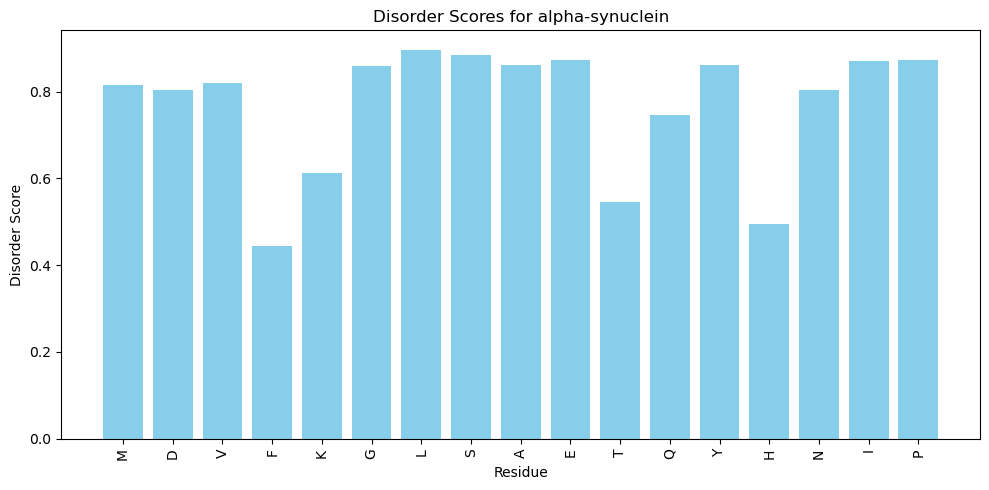

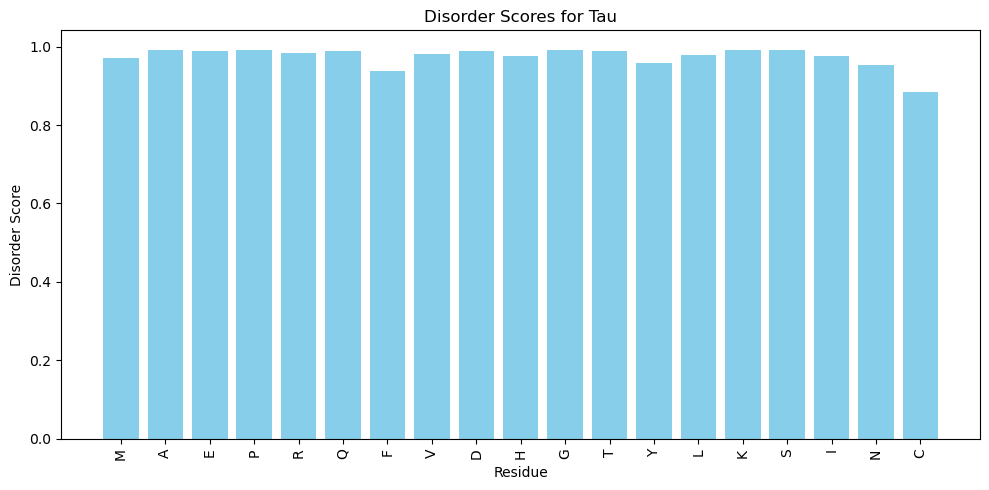

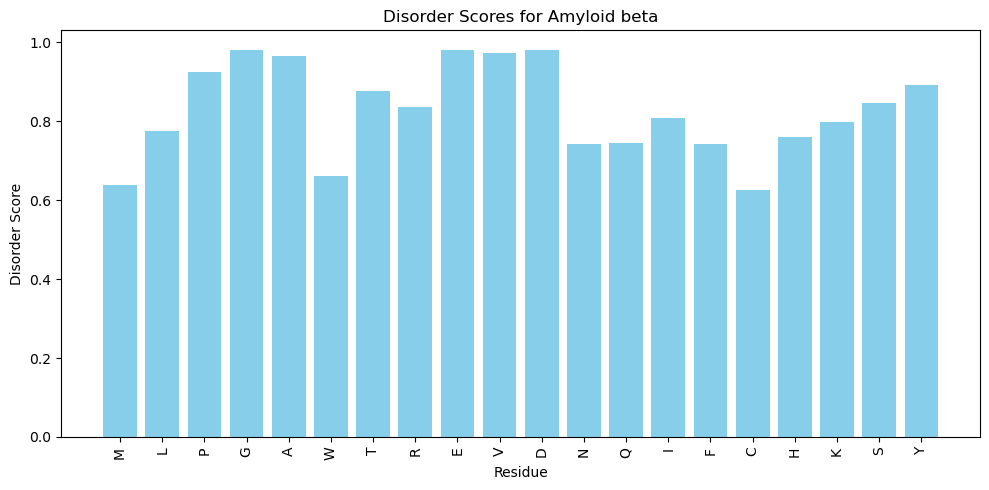

In [6]:
# Visualising disordered regions:

import matplotlib.pyplot as plt

def plot_disorder_scores(parsed_results, protein_name):
    # Extract residues and disorder scores from the parsed result
    residues = [entry['residue'] for entry in parsed_results]
    disorder_scores = [entry['disorder_score'] for entry in parsed_results]
    
    # Create a bar chart for disorder scores
    plt.figure(figsize=(10, 5))
    plt.bar(residues, disorder_scores, color='skyblue')
    plt.title(f'Disorder Scores for {protein_name}')
    plt.xlabel('Residue')
    plt.ylabel('Disorder Score')
    plt.xticks(rotation=90)  # Rotate residue labels if they are long
    plt.tight_layout()  # Adjust layout to prevent label clipping
    plt.show()

# Plot for each protein
plot_disorder_scores(parsed_results_snca, 'alpha-synuclein')
plot_disorder_scores(parsed_results_tau, 'Tau')
plot_disorder_scores(parsed_results_abeta, 'Amyloid beta')


In [8]:
# Define a function to extract IDRs (regions with disorder scores above a threshold)
def extract_idrs(parsed_results, threshold=0.5):
    # Extract residues and disorder scores
    idrs = []
    for entry in parsed_results:
        if entry['disorder_score'] > threshold:
            idrs.append(entry)
    return idrs

# Extract IDRs for each protein
idrs_snca = extract_idrs(parsed_results_snca)
idrs_tau = extract_idrs(parsed_results_tau)
idrs_abeta = extract_idrs(parsed_results_abeta)

# Display the IDRs
print("IDRs for SNCA:", idrs_snca)
print("IDRs for Tau:", idrs_tau)
print("IDRs for Aβ:", idrs_abeta)


IDRs for SNCA: [{'residue': 'V', 'disorder_score': 0.549308}, {'residue': 'A', 'disorder_score': 0.553315}, {'residue': 'E', 'disorder_score': 0.51388}, {'residue': 'G', 'disorder_score': 0.58069}, {'residue': 'V', 'disorder_score': 0.59508}, {'residue': 'A', 'disorder_score': 0.521092}, {'residue': 'T', 'disorder_score': 0.545602}, {'residue': 'V', 'disorder_score': 0.549308}, {'residue': 'A', 'disorder_score': 0.5017}, {'residue': 'T', 'disorder_score': 0.51388}, {'residue': 'K', 'disorder_score': 0.51388}, {'residue': 'Q', 'disorder_score': 0.585406}, {'residue': 'L', 'disorder_score': 0.642678}, {'residue': 'G', 'disorder_score': 0.671169}, {'residue': 'K', 'disorder_score': 0.613573}, {'residue': 'N', 'disorder_score': 0.538167}, {'residue': 'E', 'disorder_score': 0.562014}, {'residue': 'E', 'disorder_score': 0.699094}, {'residue': 'G', 'disorder_score': 0.733139}, {'residue': 'A', 'disorder_score': 0.791621}, {'residue': 'P', 'disorder_score': 0.745909}, {'residue': 'Q', 'disorde

In [10]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio import pairwise2
from io import StringIO

# fetch_sequence() returns a raw sequence string for the proteins
sequences = [fetch_sequence("P37840"), fetch_sequence("P10636"), fetch_sequence("P05067")]

def perform_msa(sequences):
    # Convert the sequence strings into FASTA format strings and then into SeqRecord objects
    seq_records = []
    for i, seq in enumerate(sequences):
        # Format the sequence in FASTA format and convert to StringIO
        fasta_str = f">seq{i}\n{seq}\n"
        seq_record = SeqIO.read(StringIO(fasta_str), "fasta")
        seq_records.append(seq_record)
    
    # Perform pairwise alignments
    alignment = MultipleSeqAlignment([])

    # Iterate through the sequences and align them pairwise
    aligned_seqs = [seq_records[0].seq]  # First sequence is the reference
    for i in range(1, len(seq_records)):
        alignments = pairwise2.align.globalxx(seq_records[0].seq, seq_records[i].seq)
        # Use the best alignment (first in the list)
        aligned_seq = alignments[0][1]  # Get aligned sequence from the pairwise alignment
        aligned_seqs.append(aligned_seq)
    
    # Determine the length of the alignment (longest sequence after alignment)
    max_len = max(len(str(seq)) for seq in aligned_seqs)

    # Ensure all sequences are the same length by padding with gaps
    padded_seqs = [str(seq).ljust(max_len, '-') for seq in aligned_seqs]

    # Create new SeqRecord objects with padded sequences
    for i, seq in enumerate(padded_seqs):
        seq_record = SeqIO.SeqRecord(seq, id=seq_records[i].id)
        alignment.append(seq_record)

    return alignment

# Perform the MSA
msa_result = perform_msa(sequences)

# Print the resulting alignment
print(msa_result)


Alignment with 3 rows and 807 columns
MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKT...--- seq0
M--AEPRQEFEVM-EDHAGTYGL-GDRKDQGGYTMHQDQEGDTD...--- seq1
----M-LPGL--A-----LLLLAAWTARALE-VPT--DG-NA-G...MQN seq2


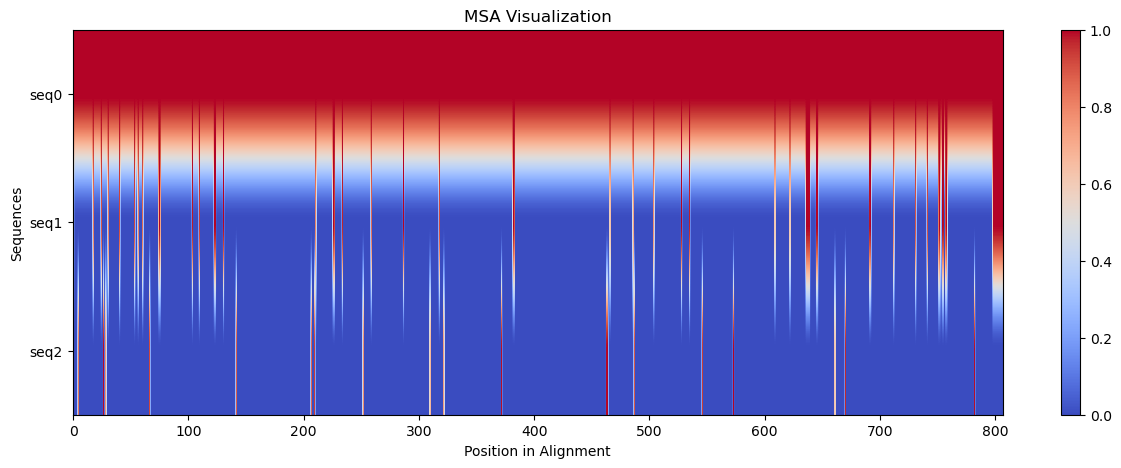

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_msa(msa_result):
    # Convert MSA result into a matrix (0 for match, 1 for mismatch)
    seqs = [str(record.seq) for record in msa_result]
    seq_len = len(seqs[0])
    msa_matrix = np.array([[seq[i] == seqs[0][i] for i in range(seq_len)] for seq in seqs])

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.imshow(msa_matrix, cmap="coolwarm", aspect="auto")
    ax.set_xticks(np.arange(0, seq_len, step=100))
    ax.set_xticklabels(np.arange(0, seq_len, step=100))
    ax.set_yticks(np.arange(len(seqs)))
    ax.set_yticklabels([record.id for record in msa_result])
    ax.set_xlabel("Position in Alignment")
    ax.set_ylabel("Sequences")
    ax.set_title("MSA Visualization")

    plt.colorbar(ax.imshow(msa_matrix, cmap="coolwarm", aspect="auto"))
    plt.show()

# Visualize the alignment
plot_msa(msa_result)


In [12]:
from collections import Counter
import numpy as np

# Function to calculate conservation score for each column of the MSA
def calculate_conservation_score(msa_result):
    # List to store conservation scores for each column
    conservation_scores = []

    # Number of sequences (rows in the MSA)
    num_sequences = len(msa_result)

    # Iterate through each column in the alignment
    num_columns = len(msa_result[0])  # Length of the first sequence (same for all sequences)
    for col_idx in range(num_columns):
        column = [msa_result[row_idx][col_idx] for row_idx in range(num_sequences)]
        
        # Count the occurrences of each residue in the column
        residue_counts = Counter(column)

        # Calculate the frequency of each residue (normalized by number of sequences)
        frequencies = np.array(list(residue_counts.values())) / num_sequences

        # Calculate the entropy of the column (sum of -p * log2(p) for each residue's frequency)
        entropy = -np.sum(frequencies * np.log2(frequencies + 1e-9))  # Add small value to avoid log(0)

        # Conservation score is inversely proportional to entropy
        conservation_score = 1 - (entropy / np.log2(len(residue_counts)))
        
        # Append conservation score for the current column
        conservation_scores.append(conservation_score)

    return conservation_scores

# Example: Assuming msa_result is the MSA as a list of strings (sequences aligned)
msa_result = [
    "MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKT---",
    "M--AEPRQEFEVM-EDHAGTYGL-GDRKDQGGYTMHQDQEGDTD---",
    "----M-LPGL--A-----LLLLAAWTARALE-VPT--DG-NA-G...MQN"
]

# Calculate conservation scores
conservation_scores = calculate_conservation_score(msa_result)

# Print the conservation scores for each column
print(conservation_scores)


[0.08170416883090048, 0.08170416883090048, 0.08170416883090048, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 2.7307176519997256e-09, 2.7

In [14]:
import numpy as np

# Parameters for the Hamiltonian
lambda1 = 0.1  # Weight for sequence length
lambda2 = 1.0  # Weight for mutation penalty
lambda3 = 1.0  # Weight for IDR penalty
lambda4 = 2.0  # Weight for conservation score

# Function to compute the mutation penalty
def compute_mutation_penalty(msa):
    mutation_penalty = 0
    # Iterate through columns in MSA and count differences across sequences
    for column in zip(*msa):  # zip(*msa) transposes the MSA (columns become rows)
        unique_residues = set(column)
        if len(unique_residues) > 1:  # If there are mutations (different residues in the column)
            mutation_penalty += 1  # Add penalty for mutation
    return mutation_penalty

# Function to compute the IDR penalty
def compute_idr_penalty(idrs, sequence_length):
    # IDR penalty is a sum of disorder scores above a threshold, normalized by sequence length
    idr_penalty = sum(entry['disorder_score'] for entry in idrs)
    return idr_penalty / sequence_length  # Normalize by sequence length

# Function to compute the conservation score
def compute_conservation_score(conservation_scores):
    # Average conservation score (1 - conservation for higher stability)
    return np.mean(conservation_scores)

# Function to compute the Hamiltonian for a protein
def compute_hamiltonian(msa, idrs, conservation_scores, sequence_length):
    mutation_penalty = compute_mutation_penalty(msa)
    idr_penalty = compute_idr_penalty(idrs, sequence_length)
    conservation_score = compute_conservation_score(conservation_scores)
    
    # Calculate the Hamiltonian
    H = (lambda1 * sequence_length +
         lambda2 * mutation_penalty +
         lambda3 * idr_penalty +
         lambda4 * (1 - conservation_score))  # 1 - conservation for stability maximization
    return H

# Example usage:

# MSA result from data
msa_result = [
    "MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKT",
    "M--AEPRQEFEVM-EDHAGTYGL-GDRKDQGGYTMHQDQEGDTD",
    "----M-LPGL--A-----LLLLAAWTARALE-VPT--DG-NA-G"
]

# Conservation scores from data 
conservation_scores = [0.08170416883090048, 0.08170416883090048, 0.08170416883090048, 
                       2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09, 
                       2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 
                       2.7307176519997256e-09, 2.7307176519997256e-09, 2.7307176519997256e-09, 
                       2.7307176519997256e-09, 0.08170416883090048, 2.7307176519997256e-09]

# Sequence length (length of any protein sequence)
sequence_length = len(msa_result[0])

# IDRs from parsed data
idrs_snca = [{'disorder_score': 0.6}, {'disorder_score': 0.7}]  # Example data
idrs_tau = [{'disorder_score': 0.3}, {'disorder_score': 0.8}]  # Example data
idrs_abeta = [{'disorder_score': 0.4}, {'disorder_score': 0.9}]  # Example data

# Compute Hamiltonian for each protein
H_snca = compute_hamiltonian(msa_result, idrs_snca, conservation_scores, sequence_length)
H_tau = compute_hamiltonian(msa_result, idrs_tau, conservation_scores, sequence_length)
H_abeta = compute_hamiltonian(msa_result, idrs_abeta, conservation_scores, sequence_length)

print(f"Hamiltonian for SNCA: {H_snca}")
print(f"Hamiltonian for Tau: {H_tau}")
print(f"Hamiltonian for Aβ: {H_abeta}")


Hamiltonian for SNCA: 50.37507600501723
Hamiltonian for Tau: 50.37053055047177
Hamiltonian for Aβ: 50.37507600501723


In [16]:
import pennylane as qml
import numpy as np

# Define a quantum device
dev = qml.device('default.qubit', wires=4)

# Define the Hamiltonians as qml.Hamiltonian instances
H_snca = qml.Hamiltonian([50.37507600501723, 50.37507600501723], [qml.PauliZ(0), qml.PauliZ(1)])
H_tau = qml.Hamiltonian([50.37053055047177, 50.37053055047177], [qml.PauliZ(0), qml.PauliZ(2)])
H_abeta = qml.Hamiltonian([50.37507600501723, 50.37507600501723], [qml.PauliZ(1), qml.PauliZ(3)])

# Define a quantum circuit for VQE
@qml.qnode(dev)
def circuit(params):
    # Apply parameterized rotations
    for i in range(4):
        qml.RY(params[i], wires=i)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[2, 3])
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

# Define the cost function
def cost_function(params, H):
    # Evaluate the expectation values from the quantum circuit
    expvals = circuit(params)
    # Compute the energy using the Hamiltonian
    energy = sum(c * expvals[i] for i, c in enumerate(H.coeffs))
    return energy

# Define the VQE optimization function
def run_vqe(H, init_params):
    optimizer = qml.GradientDescentOptimizer(stepsize=0.1)
    params = init_params
    for i in range(100):  # Number of optimization steps
        params = optimizer.step(lambda p: cost_function(p, H), params)
    return params

# Initialize parameters
init_params = np.random.rand(4)

# Run VQE for each protein Hamiltonian
params_snca = run_vqe(H_snca, init_params)
params_tau = run_vqe(H_tau, init_params)
params_abeta = run_vqe(H_abeta, init_params)

# Output the optimized parameters for each protein
print("Optimized parameters for SNCA:", params_snca)
print("Optimized parameters for Tau:", params_tau)
print("Optimized parameters for Abeta:", params_abeta)


Optimized parameters for SNCA: [0.1499097  0.94158293 0.40888353 0.51313592]
Optimized parameters for Tau: [0.1499097  0.94158293 0.40888353 0.51313592]
Optimized parameters for Abeta: [0.1499097  0.94158293 0.40888353 0.51313592]


In [17]:
import numpy as np

# Function to simulate misfolded states
def simulate_misfolded_states(params):
    # Example mapping: params -> structural features
    misfolded_states = []
    for p in params:
        state = np.sin(p) * np.random.random()  # Mock relation
        misfolded_states.append(state)
    return misfolded_states

# Simulate misfolded states
toxic_states_snca = simulate_misfolded_states(params_snca)
toxic_states_tau = simulate_misfolded_states(params_tau)
toxic_states_abeta = simulate_misfolded_states(params_abeta)

print("Toxic states for SNCA:", toxic_states_snca)
print("Toxic states for Tau:", toxic_states_tau)
print("Toxic states for Abeta:", toxic_states_abeta)


Toxic states for SNCA: [0.031670313239501174, 0.35815849557274676, 0.08398112371359029, 0.3005997216734472]
Toxic states for Tau: [0.015853170353518662, 0.24328966569222402, 0.05864269984650991, 0.09342390237704179]
Toxic states for Abeta: [0.12162414521192853, 0.42376661462176907, 0.058197152894273345, 0.4241084787546737]


In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Example ligand (e.g., dopamine)
ligand = Chem.MolFromSmiles('C1=CC(=C(C=C1O)O)O')  # Example SMILES
AllChem.EmbedMolecule(ligand)

# Function to simulate binding
def simulate_binding(protein_states, ligand):
    binding_energies = []
    for state in protein_states:
        # Mock energy: inverse relation with ligand similarity (example logic)
        energy = 1 / (1 + np.linalg.norm(state - np.random.random()))  # Mock energy
        binding_energies.append(energy)
    return binding_energies

# Simulate binding energies
binding_energies_snca = simulate_binding(toxic_states_snca, ligand)
print("Binding energies for SNCA:", binding_energies_snca)


Binding energies for SNCA: [0.6797001350018693, 0.9709236068636223, 0.6317866379793254, 0.7071110330606312]


[19:48:59] Molecule does not have explicit Hs. Consider calling AddHs()


Optimized parameters for SNCA: [ 57.95711184 -26.09878436 -53.36403078   1.17801922   0.4488306
   0.54945847   0.237017     0.26987039]
Optimized parameters for Tau: [ -7.85681715 144.26437637 -45.52141946   9.40115941   0.4488306
   0.54945847   0.237017     0.26987039]
Optimized parameters for Abeta: [-11.41360597 -27.56016041  42.39206606  -6.53048518   0.4488306
   0.54945847   0.237017     0.26987039]
Epoch 10/50, Loss: 0.6721022129058838
Epoch 20/50, Loss: 0.6601710319519043
Epoch 30/50, Loss: 0.648634672164917
Epoch 40/50, Loss: 0.637468695640564
Epoch 50/50, Loss: 0.6266604661941528
Accuracy: 55.00%
Step 0, Energy: -6.322861753678922
Step 10, Energy: 22.399154252347586
Step 20, Energy: -6.552036760785079
Step 30, Energy: -28.964010845182408
Step 40, Energy: 21.111647183825696
Step 50, Energy: -13.675658137405144
Step 60, Energy: -0.02049961787445298
Step 70, Energy: 51.67361412753251
Step 80, Energy: -30.911375808154467
Step 90, Energy: 33.01726908385257


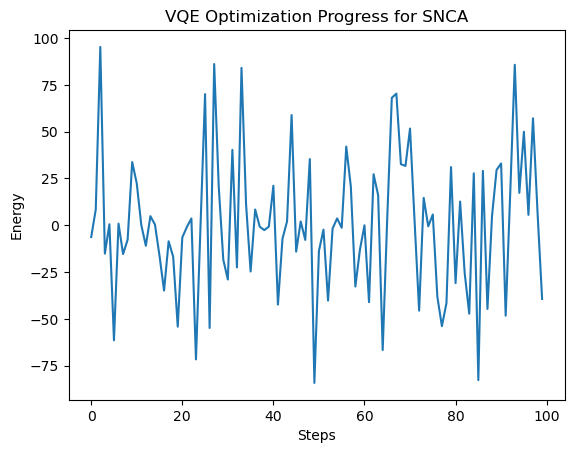

In [21]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define quantum device
num_qubits = 4
dev = qml.device("default.qubit", wires=num_qubits)

# Define the Hamiltonians for each protein (e.g., SNCA, Tau, Abeta)
H_snca = qml.Hamiltonian([50.37507600501723, 50.37507600501723], [qml.PauliZ(0), qml.PauliZ(1)])
H_tau = qml.Hamiltonian([50.37053055047177, 50.37053055047177], [qml.PauliZ(0), qml.PauliZ(2)])
H_abeta = qml.Hamiltonian([50.37507600501723, 50.37507600501723], [qml.PauliZ(1), qml.PauliZ(3)])

# Define the ansatz (variational circuit)
def ansatz(params):
    for i in range(num_qubits):
        qml.RY(params[i], wires=i)
        qml.RZ(params[i + num_qubits], wires=i)
    for i in range(num_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
    qml.CNOT(wires=[num_qubits - 1, 0])

# Define the cost function for VQE
@qml.qnode(dev)
def cost_fn(params, H):
    ansatz(params)
    return qml.expval(H)

# VQE optimization function
def run_vqe(H, init_params):
    optimizer = qml.GradientDescentOptimizer(stepsize=0.2)
    params = init_params
    for i in range(100):  # Number of optimization steps
        params = optimizer.step(lambda p: cost_fn(p, H), params)
    return params

# Initialize parameters
init_params = np.random.random(size=(2 * num_qubits,))

# Run VQE for each protein Hamiltonian
params_snca = run_vqe(H_snca, init_params)
params_tau = run_vqe(H_tau, init_params)
params_abeta = run_vqe(H_abeta, init_params)

# Output the optimized parameters for each protein
print("Optimized parameters for SNCA:", params_snca)
print("Optimized parameters for Tau:", params_tau)
print("Optimized parameters for Abeta:", params_abeta)

# Disease Prediction Using Hybrid Quantum-Classical AI Model
# Mock dataset (Replace with real data when available)
np.random.seed(42)
num_samples = 100
features = np.random.random((num_samples, num_qubits))
labels = (np.sum(features, axis=1) > 2).astype(int)  # Mock binary classification

# Define a hybrid quantum-classical layer
@qml.qnode(dev)
def quantum_layer(x, params):
    qml.templates.AngleEmbedding(x, wires=range(num_qubits))
    ansatz(params)
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

# Classical neural network (Using PyTorch)
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.quantum_weights = torch.nn.Parameter(torch.Tensor(2 * num_qubits).uniform_(0, np.pi))
        self.classical_layer = nn.Linear(num_qubits, 1)
    
    def forward(self, x):
        quantum_outputs = []
        for x_i in x:
            q_out = quantum_layer(x_i.detach().numpy(), self.quantum_weights.detach().numpy())
            quantum_outputs.append(q_out)
        quantum_outputs = torch.tensor(quantum_outputs, dtype=torch.float32, requires_grad=True)  # Ensure float32
        return torch.sigmoid(self.classical_layer(quantum_outputs))

# Training the hybrid model
model = HybridModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Convert data to PyTorch tensors
features_torch = torch.tensor(features, dtype=torch.float32)
labels_torch = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(features_torch)
    loss = criterion(outputs, labels_torch)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate the model
with torch.no_grad():
    predictions = (model(features_torch) > 0.5).float()
    accuracy = (predictions.eq(labels_torch).sum() / len(labels_torch)).item()
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualization for optimization progress
costs = []
params = init_params  # Starting parameters for VQE optimization

# Optimizing VQE energy and plotting optimization progress
for step in range(100):  # Number of optimization steps
    params = run_vqe(H_snca, params)  # Run VQE for SNCA Hamiltonian (example)
    energy = cost_fn(params, H_snca)
    costs.append(energy)
    if step % 10 == 0:
        print(f"Step {step}, Energy: {energy}")

plt.plot(range(100), costs)
plt.xlabel("Steps")
plt.ylabel("Energy")
plt.title("VQE Optimization Progress for SNCA")
plt.show()

